# Importing Libraries

In [ ]:
[[254,7],[4,257]]

[[254, 7], [4, 257]]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


Loading Dataset

In [ ]:
datapath = r'/content/drive/MyDrive/Group05/Regression/BivariateData/5.csv'

In [ ]:
dataset = np.loadtxt(datapath,delimiter=",")
print(dataset.shape)

(10201, 3)


Plotting Dataset

In [ ]:
def plot(data):  
  x , y , z = data[:,0] , data[:,1] , data[:,2]
  fig = plt.figure(figsize = (10, 7))
  ax = plt.axes(projection ="3d")
 
  # Creating plot
  ax.scatter3D(x, y, z, color = "yellow" , edgecolor="black")
  # show plot  
  plt.title("Bivariate Dataset")
  plt.savefig("/content/drive/MyDrive/Group05/results/2D.png")

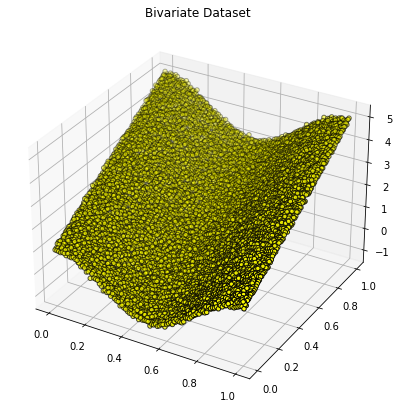

In [ ]:
plot(dataset)

## Train Test Split (70%-30%)

In [ ]:
def train_test_split(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    training = data[:l1]
    validation = data[l1:l2]
    test = data[l2:m]
    
    return training, validation, test

In [ ]:
train_data,valid_data, test_data = train_test_split(dataset)

In [ ]:
train_data.shape

(6120, 3)

# Perceptron Training Model


In [ ]:
def sigmoid_af(x):
  s = 1/(1+np.exp(-(x)))
  return s

In [ ]:
def inst_error(y, yp):
    return sum(0.5*(y-yp)**2)

In [ ]:
def training(xn,n1,n2):
    N,d=xn.shape
    wh1 = 0.01*np.random.randn(3, n1+1)
    wh2 = 0.01*np.random.randn(n1+1, n2+1)
    wo = 0.01*np.random.randn(n2+1, 1)
    avg_err = []
    epoch = 50
    
    while(epoch):
    
        err = []
        
        for i in range(N):
            
            y = xn[i, 2]

            xi = [1, xn[i,0], xn[i,1]] #Input layer
            #--------------------------
            h1 = np.dot(wh1.T, xi) #hidden layer 1 out
            a1 = sigmoid_af(h1) #hidden layer 1 activation out
            #--------------------------
            h2 = np.dot(wh2.T, a1) #hidden layer 2 out
            a2 = sigmoid_af(h2) #hidden layer 2 activation out
            #--------------------------
            out = np.dot(wo.T, a2) #Output layer out
            ao = out #Output activation 
            #--------------------------
               
            en = inst_error(y, ao)
            err.append(en)
            neta = 0.01
            
            #Update weights
            wo = wo + (neta * np.outer(a2, (y-ao)))
                        
            var1 = np.dot(wo, (y-ao))
            var2 = a2*(1-a2)
            wh2 = wh2 + (neta * np.outer(a1, var1*var2))
            
            var3 = var1*var2
            var4 = np.dot(wh2, var3)
            var5 = a1*(1-a1)
            wh1 = wh1 + (neta * np.outer(xi, var4*var5))

            
        avg_error = sum(err)/len(err)
        avg_err.append(avg_error)
        if epoch%1==0:
            print("ERROR: ",avg_error)
        epoch -= 1
    
    return wh1, wh2, wo, avg_err

wh11, wh21, wo1, avg_err1 = training(train_data,3,2)
wh12, wh22, wo2, avg_err2 = training(train_data,4,4) 


ERROR:  0.9521790014188759
ERROR:  0.8499201368847064
ERROR:  0.7485072002135095
ERROR:  0.6611759313501354
ERROR:  0.6041474601475112
ERROR:  0.5679629825610585
ERROR:  0.543971317155369
ERROR:  0.5272375493321639
ERROR:  0.5150445601038652
ERROR:  0.505839135037035
ERROR:  0.49868841747727594
ERROR:  0.49300456941375576
ERROR:  0.48840059494361704
ERROR:  0.48461161589350815
ERROR:  0.4814500790477158
ERROR:  0.4787792465091441
ERROR:  0.4764968971658356
ERROR:  0.47452492934958346
ERROR:  0.47280249152972487
ERROR:  0.47128129490221576
ERROR:  0.4699223202727216
ERROR:  0.4686934428565039
ERROR:  0.46756767655981096
ERROR:  0.4665218440186236
ERROR:  0.4655355424594607
ERROR:  0.4645903162380943
ERROR:  0.4636689751256684
ERROR:  0.462755019473184
ERROR:  0.46183215339407596
ERROR:  0.4608838874090196
ERROR:  0.4598932530200162
ERROR:  0.45884267124058276
ERROR:  0.4577140297623563
ERROR:  0.4564890209959272
ERROR:  0.455149767962263
ERROR:  0.4536797157411162
ERROR:  0.452064703558

# Testing

In [ ]:
def testing(test_data, wh1, wh2, wo):
    N=len(test_data)
    z_pred_list = []
    err=[]
    a1_list=[]
    a2_list=[]
    for i in range(N):
       z_true=test_data[i, 2]
       xi = [1, test_data[i,0], test_data[i,1]]        
       h1 = np.dot(wh1.T, xi)
       a1 = sigmoid_af(h1)
       a1_list.append(a1)
        
       h2 = np.dot(wh2.T, a1)
       a2 = sigmoid_af(h2)
       a2_list.append(a2)

       z_pred = np.dot(wo.T, a2)
       e=(z_true-z_pred)**2
      
       z_pred_list.append(z_pred)
       err.append(e)
    mse=sum(err)/len(err)       

    return z_pred_list,mse,np.array(a1_list),np.array(a2_list) 

z_pred_ts,msets,h1,h2 = testing(test_data, wh12, wh22, wo2)
z_pred_tr,msetr,h1,h2  = testing(train_data,wh12, wh22, wo2)
z_pred_vd,msevd,h1,h2  = testing(valid_data, wh12, wh22, wo2)



In [ ]:
yp1,mse1,h11,h21=testing(test_data,wh11, wh21, wo1)
yp2,mse2,h12,h22=testing(test_data,wh12, wh22, wo2)

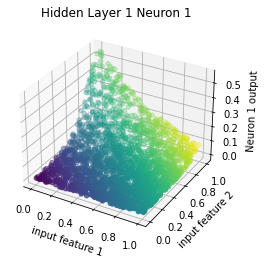

In [ ]:
x,y,z=test_data[:,0],test_data[:,1],h11[:,0]
fig = plt.figure()
ax = plt.axes(projection ="3d")
color_map = plt.get_cmap('spring')
scatter_plot = ax.scatter3D(x, y, z, c=(x+y+z))
plt.title("Hidden Layer 1 Neuron 1")
plt.xlabel("input feature 1")
plt.ylabel("input feature 2")
ax.set_zlabel("Neuron 1 output")
cb=plt.colorbar(scatter_plot)
cb.remove() 

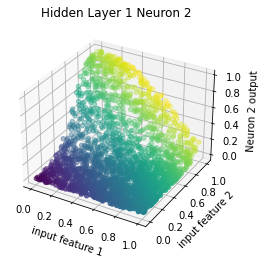

In [ ]:
x,y,z=test_data[:,0],test_data[:,1],h11[:,1]
fig = plt.figure()
ax = plt.axes(projection ="3d")
color_map = plt.get_cmap('spring')
scatter_plot = ax.scatter3D(x, y, z, c=(x+y+z))
plt.title("Hidden Layer 1 Neuron 2")
plt.xlabel("input feature 1")
plt.ylabel("input feature 2")
ax.set_zlabel("Neuron 2 output")
cb=plt.colorbar(scatter_plot)
cb.remove() 

# Results

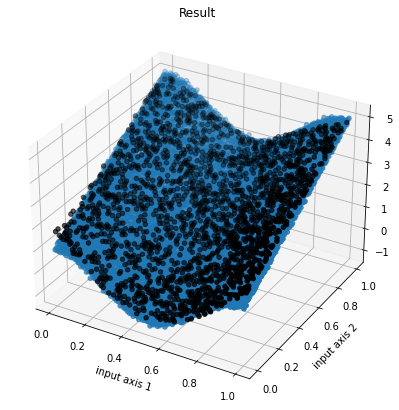

In [ ]:
x , y , z = dataset[:,0] , dataset[:,1] , dataset[:,2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
  # Creating plot
ax.scatter3D(x, y, z )
ax.scatter3D(test_data[:,0], test_data[:,1], z_pred_ts , color="black")
  # show plot  
plt.title("Result")
plt.xlabel("input axis 1")
plt.ylabel("input axis 2")
plt.savefig("/content/drive/MyDrive/Group05/results/2D_result.png")

Error vs Epoch Plot

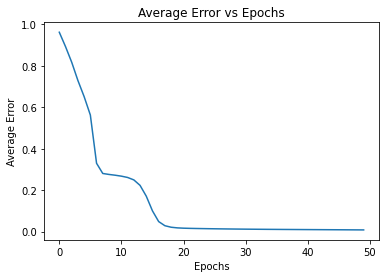

In [ ]:
plt.plot(avg_err)
plt.title("Average Error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.savefig("/content/drive/MyDrive/Group05/results/2D_errorvsepoch.png")
plt.show()

Mean Sqaured Error

<ipython-input-103-64431b622d27>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y=[np.asscalar(msetr),np.asscalar(msets),np.asscalar(msevd)]


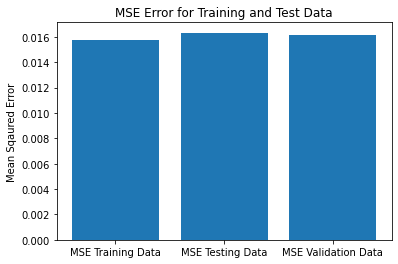

In [ ]:
x=["MSE Training Data","MSE Testing Data","MSE Validation Data"]
y=[np.asscalar(msetr),np.asscalar(msets),np.asscalar(msevd)]

plt.bar(x,y)

plt.title("MSE Error for Training and Test Data")
plt.ylabel("Mean Sqaured Error")
# plt.savefig("/content/drive/MyDrive/Group05/results/mse2D.png")
plt.show()

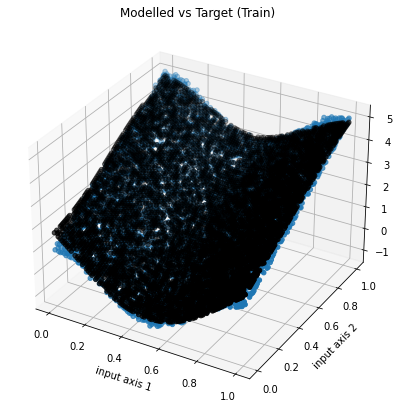

In [ ]:
x , y , z = train_data[:,0] , train_data[:,1] , train_data[:,2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
  # Creating plot
ax.scatter3D(x, y, z)
ax.scatter3D(train_data[:,0], train_data[:,1], z_pred_tr , color="black")
  # show plot 
plt.xlabel("input axis 1")
plt.ylabel("input axis 2") 
plt.title("Modelled vs Target (Train)")
plt.savefig("/content/drive/MyDrive/Group05/results/2D_train_result.png")

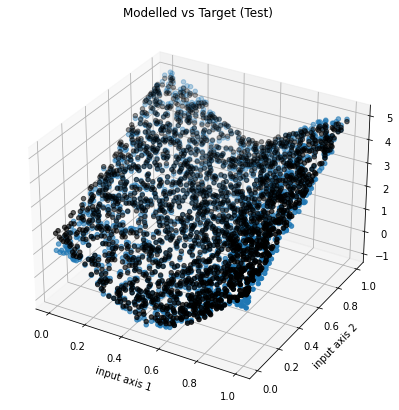

In [ ]:
x , y , z = test_data[:,0] , test_data[:,1] , test_data[:,2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
  # Creating plot
ax.scatter3D(x, y, z)
ax.scatter3D(test_data[:,0], test_data[:,1], z_pred_ts , color="black")
  # show plot 
plt.xlabel("input axis 1")
plt.ylabel("input axis 2") 
plt.title("Modelled vs Target (Test)")
plt.savefig("/content/drive/MyDrive/Group05/results/2D__test_result.png")

Text(0.5, 0.92, 'Modelled vs Target (Validation)')

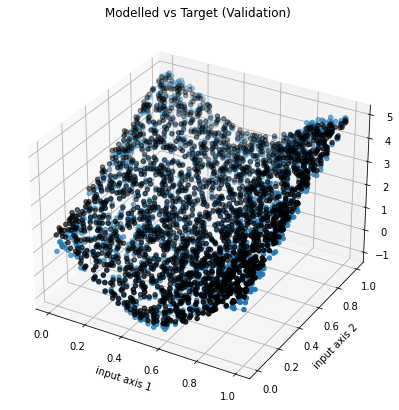

In [ ]:
x , y , z = valid_data[:,0] , valid_data[:,1] , valid_data[:,2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
  # Creating plot
ax.scatter3D(x, y, z)
ax.scatter3D(valid_data[:,0], valid_data[:,1], z_pred_vd , color="black")
  # show plot 
plt.xlabel("input axis 1")
plt.ylabel("input axis 2") 
plt.title("Modelled vs Target (Validation)")
# plt.savefig("/content/drive/MyDrive/Group05/results/2D__test_result.png")

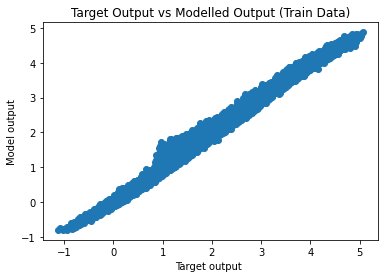

In [ ]:
plt.scatter(train_data[:,2],z_pred_tr)  
plt.title("Target Output vs Modelled Output (Train Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")
plt.savefig("/content/drive/MyDrive/Group05/results/4Bivarate_train.png")

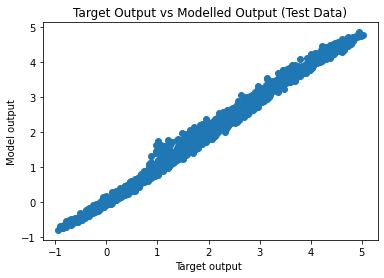

In [ ]:
plt.scatter(test_data[:,2],z_pred_ts)
plt.title("Target Output vs Modelled Output (Test Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")
plt.savefig("/content/drive/MyDrive/Group05/results/4Bivarate_test.png")

Text(0, 0.5, 'Model output')

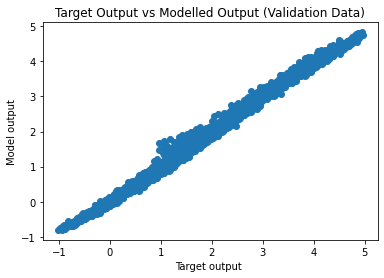

In [ ]:
plt.scatter(valid_data[:,2],z_pred_vd)
plt.title("Target Output vs Modelled Output (Validation Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")
# plt.savefig("/content/drive/MyDrive/Group05/results/4Bivarate_test.png")
